Desafio 1 - Importando dataset pelo pydataset
Definição do problema: Dado o código do dataset retorne as seguintes informações:

Importe o dataset utilizando a seguinte função do pydataset: data(“Código”)
Imprimir na tela o dataset;
Informe o tipo de dados retornado pela função data;
Informe o número de exemplos (linhas) e características (colunas) do dataset.
Crie uma função que ao receber um DataFrame retorna o número de linhas e colunas.
Código do dataset: plantTraits

Dicas:

plantTraits é um dataset que contém a descrição, por meio de atributos biológicos, de diferentes espécies de plantas;

função built-in (nativa da linguagem Python): type()

atributo do DataFrame: shape

[ ]



In [2]:
!pip install pydataset
from pydataset import data

codigo_dataset = "plantTraits"

df_plant_traits = data(codigo_dataset)

print("Dataset:")
print(df_plant_traits)

tipo_dados = type(df_plant_traits)
print(f"\nTipo de dados retornado pela função data: {tipo_dados}")

num_linhas, num_colunas = df_plant_traits.shape
print(f"\nNúmero de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

def obter_info_dataframe(dataframe):
    num_linhas, num_colunas = dataframe.shape
    return num_linhas, num_colunas

num_linhas_df, num_colunas_df = obter_info_dataframe(df_plant_traits)
print(f"\nNúmero de linhas usando a função: {num_linhas_df}")
print(f"Número de colunas usando a função: {num_colunas_df}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=020a1d708c5cd5c75dde5bd49af8ea39332407b7ca624058aae20ae05ceeb05b
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/
Dataset:
          pdias  longindex  durflow  height  begflow  mycor  vegaer  vegsout  autopoll  insects  \
Aceca    96.840   0.000000        2       7        5    2.0     0.0      0.0         0        4   
Aceps   110.720   0.000000        3       8        4    2.0     0.0      0.0         0        4   
Agrca     0.060   0.666667        3       2        6    2.0     0.0      1.0         0        0   
Agrst     0.080   0.488889        2       2        7    1.0     2.0      0.0         0        0   
Ajure     1.480   0.476190       

Desafio 2: Conversão
Definição do problema: Dada a tabela com a média de altura e peso de mulheres estadunidenses, onde os nomes das colunas estão em inglês height (altura) e weight (peso) e seus respectivos valores estão nas seguintes unidades: polegada e libras.

Construa uma nova representação onde os nomes das colunas estão em português, e os valores de altura são convertidos para centímetros e os valores de peso convertidos para quilograma.
Plote o scatterplot de altura x peso da nova representação.
Código do dataset: women

Dicas:

1 polegada = 2,54 centímetros

1 libra = 0,45 quilos

use o método .plot.scatter()

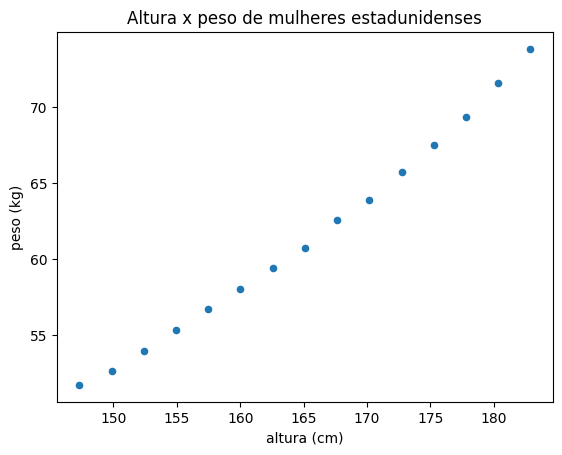

In [3]:
#!pip install pydataset
#from pydataset import data

#colocando as informações do dataset em um dataframe
df_women = data("women")

#criando novo dataframe, que é cópia do anterior
novo_df_women = df_women.copy()

#mudando os nomes das colunas para português
novo_df_women = novo_df_women.rename(columns={"height": "altura", "weight": "peso"})

#convertendo altura para cm e peso para kg
novo_df_women['altura'], novo_df_women['peso'] = novo_df_women['altura'] * 2.54, novo_df_women['peso'] * 0.45

#importando a biblioteca matplotlib
import matplotlib.pyplot as plt

#criando o gráfico a partir do dataframe e definindo título e nomes dos eixos
novo_df_women.plot.scatter(x='altura', y='peso')
plt.title("Altura x peso de mulheres estadunidenses")
plt.xlabel("altura (cm)")
plt.ylabel("peso (kg)")
plt.show()

Desafio 3: Titanic
Definição do problema: Dado que você está trabalhando com um grupo de historiadores que estão analisando o naufrágio do Titanic, informe aos historiadores as seguintes questões?

Quantas pessoas sobreviveram e quantas morreram?
Quantas pessoas eram da primeira, segunda e terceira classe?
Qual a porcentagem de sobreviventes na primeira classe?
Qual a porcentagem de mortos da terceira classe?
Código do dataset: titanic

Dicas:

value_counts() (Itens 1 e 2)

seleção de subconjuntos (Itens 3 e 4)

In [4]:
!pip install pydataset
from pydataset import data

dataset = "titanic"

df_titanic = data(dataset)

# quantidade de pessoas que sobreviveram e morreram do navio
died = df_titanic.survived.value_counts()['no']
survived = df_titanic.survived.value_counts()['yes']
print('1- ',survived, 'pessoas sobreviveram e ', died, ' morreram no acidente do titanic.')

# Contagem dos passageiros da primeira, segunda e terceira classe
first = df_titanic['class'].value_counts()['1st class']
second = df_titanic['class'].value_counts()['2nd class']
third = df_titanic['class'].value_counts()['3rd class']
print('2- ','Haviam ', first, ' pessoas na primeira classe, ', second, ' na segunda e ', third, ' na terceira.')

df_survived = df_titanic[df_titanic['survived']=='yes']
survived_first = df_survived['class'].value_counts()['1st class']
# porcentagem de sobreviventes na primeira classe
perc_surv_first = round((survived_first/len(df_survived))*100, 2)
print('3- ',perc_surv_first, '% dos sobreviventes eram da primeira classe.')

df_died = df_titanic[df_titanic['survived']=='no']
died_third = df_died['class'].value_counts()['3rd class']
# porcentagem de mortos na terceira classe
perc_died_third = round((died_third/len(df_died))*100, 2)
print('4- ',perc_died_third, '% dos mortos eram da terceira classe.')

1-  499 pessoas sobreviveram e  817  morreram no acidente do titanic.
2-  Haviam  325  pessoas na primeira classe,  285  na segunda e  706  na terceira.
3-  40.68 % dos sobreviventes eram da primeira classe.
4-  64.63 % dos mortos eram da terceira classe.


Desafio 4: Futebol

Definição do problema: Dado que você está trabalhando numa emissora de televisão, o narrador precisa informar o jogo com o maior número de gols na história da Bundesliga (Campeonato Alemão). Você precisa fazer uma busca em todos os jogos da história deste campeonato e verificar qual jogo é esse e passar a informação ao narrador, para posteriormente, o narrador informar aos telespectadores.

Verificar os jogos com maior quantidade de gols na história da Bundesliga
Informar a data, os times participantes e o placar do jogo
Código do dataset: Bundesliga

Dicas:

Criar uma nova variável "TotalGols" com o total de gols da partida;
Use o método.max()

In [5]:
!pip install pydataset
from pydataset import data

codigo_dataset = "Bundesliga"

df_bundesliga = data(codigo_dataset)

#print("Colunas disponíveis:")
#print(df_bundesliga.columns)

df_bundesliga["TotalGols"] = df_bundesliga["HomeGoals"] + df_bundesliga["AwayGoals"]

#Encontrar a linha com o maior número de gols
linha_max_gols = df_bundesliga.loc[df_bundesliga["TotalGols"].idxmax()]

#Extrair informações da linha com mais gols
data_jogo = linha_max_gols["Date"]
times_participantes = f"{linha_max_gols['HomeTeam']} vs {linha_max_gols['AwayTeam']}"
placar_jogo = f"{linha_max_gols['TotalGols']} - {linha_max_gols['TotalGols']}"

#Informar ao narrador
print(f"Jogo com o maior número de gols na história da Bundesliga:")
print(f"Data: {data_jogo}")
print(f"Times: {times_participantes}")
print(f"Placar: {placar_jogo}")

Jogo com o maior número de gols na história da Bundesliga:
Data: 1963-11-16 09:30:00
Times: Borussia Dortmund vs 1. FC Kaiserslautern
Placar: 12 - 12


Desafio 5: Forbes

Definição do problema: Você está trabalhando em um jornal e o editor quer que você responda as seguintes questões:

Qual a empresa mais valiosa da lista da Forbes 2000?
Construa uma tabela com as TOP 10 empresas mais lucrativas da lista.
Qual a média de valores de empresa das cinco categorias mais valiosas?
Código do dataset: Forbes2000

Dicas:

Método .max()
Método nlargest()
Método .groupby()

In [6]:
# Importar bibliotecas necessárias
from pydataset import data
import pandas as pd

# Carregar o conjunto de dados Forbes2000
forbes_2000 = data('Forbes2000')

# Questão 1: Qual a empresa mais valiosa da lista da Forbes 2000?
empresa_mais_valiosa = forbes_2000.loc[forbes_2000['marketvalue'].idxmax(), 'name']
print(f"A empresa mais valiosa da lista da Forbes 2000 é: {empresa_mais_valiosa}")

# Questão 2: Construindo uma tabela com as TOP 10 empresas mais lucrativas da lista.
top_10_empresas_lucrativas = forbes_2000.nlargest(10, 'profits')
print("TOP 10 empresas mais lucrativas da lista:")
print(top_10_empresas_lucrativas[['name', 'profits']])

# Questão 3: Qual a média de valores de empresa das cinco categorias mais valiosas?
top_5_categorias_valiosas = forbes_2000.groupby('category')['marketvalue'].mean().nlargest(5)


A empresa mais valiosa da lista da Forbes 2000 é: General Electric
TOP 10 empresas mais lucrativas da lista:
                name  profits
4         ExxonMobil    20.96
1          Citigroup    17.85
2   General Electric    15.59
6    Bank of America    10.81
5                 BP    10.27
20       Freddie Mac    10.09
22      Altria Group     9.20
10   Wal-Mart Stores     9.05
31         Microsoft     8.88
17             Total     8.84
